# Project 2 - Fama & French five-factor model
This is a second version of [Project 2](https://github.com/aambroo/AI4Finance/blob/master/Project2/ThreeFactorModel.ipynb) which, in addition to the Fama and French Three Factor Model, takes into account two more constants:
+  **TERM**: defined as the difference in yields between 10 year and 3 months U.S. Treasuries
+  **CREDIT**: defined as the difference in yields between BAA and AAA U.S. corporate bonds.

Both the factors can be found at the Federal Reserve website. For convenience, I decided to download them directly through the `fredpy` API available for python.\
To install it simply run:



In [169]:
# IMPORTS
import pandas as pd
import pandas_datareader as pdr
import statsmodels.formula.api as smf
import datetime as dt
import matplotlib.pyplot as plt
import fredpy as fp

### Get Treasury Data from U.S. Federal Reserve

In [170]:
from logins import KEY
fp.api_key = KEY

In [171]:
# TERM FACTOR
term_series = fp.series('T10Y3M')#.window(['2000-11-1','2020-1-1'])
term_df = (term_series.as_frequency(freq='M', method='last').data).to_frame()
term_df.columns = ['TERM']
term_df.head()

# # PLOTTING
# plt.plot(term_series.data.index,term_series.data.values,'-',lw=1,alpha = 0.85)
# plt.grid()

/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))
/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))


,TERM
date,
1982-01-01,1.06
1982-02-01,1.03
1982-03-01,0.19
1982-04-01,0.72
1982-05-01,1.74


In [172]:
# AAA FACTOR
AAA_series = fp.series('AAA')#.window(['2000-11-1','2020-1-1'])
AAA_df = (AAA_series.as_frequency(freq='M', method='last').data).to_frame()
AAA_df.columns = ['AAA']
AAA_df.head()

# # PLOTTING
# plt.plot(AAA_series.data.index,AAA_series.data.values,'-',lw=1,alpha = 0.85)
# plt.grid()

/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))
/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))


,AAA
date,
1919-01-01,5.35
1919-02-01,5.35
1919-03-01,5.39
1919-04-01,5.44
1919-05-01,5.39


In [173]:
# BAA FACTOR
BAA_series = fp.series('BAA')#.window(['2000-11-1','2020-1-1'])
BAA_df = (BAA_series.as_frequency(freq='M', method='last').data).to_frame()
BAA_df.columns = ['BAA']
BAA_df.head()

# # PLOTTING
# plt.plot(BAA_series.data.index,BAA_series.data.values,'-',lw=1,alpha = 0.85)
# plt.grid()

/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))
/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/fredpy/__init__.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.data = pd.Series([],pd.to_datetime([]))


,BAA
date,
1919-01-01,7.12
1919-02-01,7.20
1919-03-01,7.15
1919-04-01,7.23
1919-05-01,7.09


## Single-Stock Portfolio

In [174]:
# DEFINE PARAMETERS
ASSET = 'AAPL'
BENCHMARK = '^GSPC'
START_DATE = '1992-01-01'
END_DATE = '2022-01-01'

In [175]:
# USE FAMA&FRENCH DATAFRAME
dateparse = lambda x: dt.datetime.strptime(x,'%Y%m')
ff_df = pd.read_csv('./data/F-F_Research_Data_Factors.CSV',
                        header=0,
                        names=['Date','Mkt-RF','SMB','HML','RF'],
                        parse_dates=['Date'], date_parser=dateparse,
                        index_col=0,
                        skipfooter=99,
                        skiprows=3,
                        engine='python')

In [176]:
# MERGE INTO SINGLE DATAFRAME
factors = {
    'mkt'   : ff_df['Mkt-RF'],
    'smb'   : ff_df['SMB'],
    'hml'   : ff_df['HML'],
    'rf'    : ff_df['RF'],
    'term'  : term_df['TERM'],
    'credit': BAA_df['BAA'] - AAA_df['AAA'] 
}
factor_df = pd.DataFrame(factors).dropna()
factor_df

,mkt,smb,hml,rf,term,credit
1982-01-01,-3.24,-1.28,3.19,0.80,1.06,1.92
1982-02-01,-5.86,0.44,6.05,0.92,1.03,1.91
1982-03-01,-1.87,-0.21,3.83,0.98,0.19,2.24
1982-04-01,3.27,1.47,-2.70,1.13,0.72,2.32
1982-05-01,-3.99,0.52,1.76,1.06,1.74,2.38
...,...,...,...,...,...,...
2021-09-01,-4.37,0.80,5.09,0.00,1.48,0.70
2021-10-01,6.65,-2.28,-0.44,0.00,1.50,0.67
2021-11-01,-1.55,-1.35,-0.53,0.00,1.38,0.66
2021-12-01,3.10,-1.57,3.23,0.01,1.46,0.65


In [177]:
# DOWNLOAD DATA FROM YAHOO FINANCE OF ASSET
stock_df = pdr.get_data_yahoo(ASSET, START_DATE, END_DATE, interval='m')
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-01,157.259995,141.270004,152.830002,141.500000,1.797835e+09,141.113998
2021-10-01,153.169998,138.270004,141.899994,149.800003,1.565079e+09,149.391357
2021-11-01,165.699997,147.479996,148.990005,165.300003,1.691029e+09,164.849091
2021-12-01,182.130005,157.800003,167.479996,177.570007,2.444767e+09,177.344055
2022-01-01,182.940002,154.699997,177.830002,174.779999,2.108446e+09,174.557602


In [178]:
# CALCULATE MONTHLY RETURNS
monthly_rets = stock_df['Adj Close'].pct_change().dropna()
monthly_rets.name = 'rtn'
monthly_rets

Date
1992-02-01    0.042472
1992-03-01   -0.135423
1992-04-01    0.032189
1992-05-01   -0.006237
1992-06-01   -0.196653
                ...   
2021-09-01   -0.066640
2021-10-01    0.058657
2021-11-01    0.103471
2021-12-01    0.075796
2022-01-01   -0.015712
Name: rtn, Length: 360, dtype: float64

In [179]:
# MERGE DATASETS AND CALCULATE EXCESS RETURN
# (Excess Return) = (Return on Asset) - (Risk-free Return)
ff_data = factor_df.join(monthly_rets, on=factor_df.index).dropna()
#ff_data.columns = ['mkt', 'smb', 'hml', 'rf', 'rtn']
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf    # Excess Return
ff_data

,mkt,smb,hml,rf,term,credit,rtn,excess_rtn
1992-02-01,1.09,0.87,6.47,0.28,3.24,0.94,0.042472,-0.237528
1992-03-01,-2.66,-1.04,3.55,0.34,3.39,0.90,-0.135423,-0.475423
1992-04-01,1.07,-6.06,4.32,0.32,3.82,0.88,0.032189,-0.287811
1992-05-01,0.30,0.41,1.19,0.28,3.54,0.85,-0.006237,-0.286237
1992-06-01,-2.34,-3.07,3.25,0.32,3.49,0.83,-0.196653,-0.516653
...,...,...,...,...,...,...,...,...
2021-09-01,-4.37,0.80,5.09,0.00,1.48,0.70,-0.066640,-0.066640
2021-10-01,6.65,-2.28,-0.44,0.00,1.50,0.67,0.058657,0.058657
2021-11-01,-1.55,-1.35,-0.53,0.00,1.38,0.66,0.103471,0.103471
2021-12-01,3.10,-1.57,3.23,0.01,1.46,0.65,0.075796,0.065796


Let's slice the dataset into the following timeframes:
+ $30$ Y
+ $20$ Y
+ $15$ Y
+ $10$ Y
+ $5$ Y

In [180]:
# DATAFRAME SLICING
ff_data_30y = ff_data.loc[ff_data.index >= '1992-01-01']
ff_data_20y = ff_data.loc[ff_data.index >= '2002-01-01']
ff_data_10y = ff_data.loc[ff_data.index >= '2012-01-01']
ff_data_5y = ff_data.loc[ff_data.index >= '2017-01-01']
datasets = [ff_data_30y, ff_data_20y, ff_data_10y, ff_data_5y]

In [181]:
# ESTIMATE THE FIVE-FACTOR MODEL
ff_model = smf.ols(
    formula='excess_rtn ~ mkt + smb + hml + term + credit',
    data=ff_data_5y).fit()
ff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             excess_rtn   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     10.17
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           6.19e-07
Time:                        18:41:29   Log-Likelihood:                 63.052
No. Observations:                  61   AIC:                            -114.1
Df Residuals:                      55   BIC:                            -101.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1919      0.079     -2.426      0.019      -0.351      -0.033
mkt            0.0141      0.003      5.160      0.000       0.009       0.020
smb           -0.0016      0.005     -0.342      0.734      -0.011       0.008
hml           -0.0047      0.003     -1.513      0.136      -0.011       0.002
term           0.0897      0.026      3.473      0.001       0.038       0.141
credit         0.0511      0.074      0.695      0.490      -0.096       0.199
==============================================================================
Omnibus:                        7.596   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.166
Skew:                          -0.536   Prob(JB):                       0.0169
Kurtosis:                       4.436   Cond. No.                         46.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
datasets = [ff_data_30y, ff_data_20y, ff_data_10y, ff_data_5y]
def five_factor_model (datasets):
    '''
    Takes as input a database (or list of databases) and performs linear regression taking as variables:
        - `mkt`: excess return of the market.
        - `smb`: excess return of stocks with a small market cap over those with a large market cap.
        - `hml`: excess return of value stocks over growth stocks.
        - `excess_rtn`: (Ra - Rf) = asset return - risk-free return.
    :params datasets: (Pandas Dataframe) or (list of Pandas DataFrames)
    :return summary: (Pandas Dataframe) containing the summary of the ols regression analysis.
    '''
    labels = {
            'interval': ['30Y', '20Y', '10Y', '5Y'],
            'alpha': [],
            't-alpha': [],
            'p-alpha': [],
            'mkt': [],
            't-mkt': [],
            'p-mkt': [],
            'smb': [],
            't-smb': [],
            'p-smb': [],
            'hml': [],
            't-hml': [],
            'p-hml': [],
            'term': [],
            't-term': [],
            'p-term': [],
            'credit': [],
            't-credit': [],
            'p-credit': [],
            }
    for df in datasets:
        ff_model = smf.ols(
            formula = 'excess_rtn ~ mkt + smb + hml + term + credit',
            data = df
        ).fit()
        
        labels['alpha'].append(ff_model.params[0].round(4))
        labels['t-alpha'].append(ff_model.tvalues[0].round(4))
        labels['p-alpha'].append(ff_model.pvalues[0].round(4))
        labels['mkt'].append(ff_model.params[1].round(4))
        labels['t-mkt'].append(ff_model.tvalues[1].round(4))
        labels['p-mkt'].append(ff_model.pvalues[1].round(4))
        labels['smb'].append(ff_model.params[2].round(4))
        labels['t-smb'].append(ff_model.tvalues[2].round(4))
        labels['p-smb'].append(ff_model.pvalues[2].round(4))
        labels['hml'].append(ff_model.params[3].round(4))
        labels['t-hml'].append(ff_model.tvalues[3].round(4))
        labels['p-hml'].append(ff_model.pvalues[3].round(4))
        labels['term'].append(ff_model.params[4].round(4))
        labels['t-term'].append(ff_model.tvalues[4].round(4))
        labels['p-term'].append(ff_model.pvalues[4].round(4))
        labels['credit'].append(ff_model.params[5].round(4))
        labels['t-credit'].append(ff_model.tvalues[5].round(4))
        labels['p-credit'].append(ff_model.pvalues[5].round(4))
        #print(results.summary())
    summary = pd.DataFrame(labels)
    return summary
# summary = three_factor_model(datasets)
# summary

In [183]:
# alpha
alpha = five_factor_model(datasets)[['interval', 'alpha', 't-alpha', 'p-alpha']]
alpha

,interval,alpha,t-alpha,p-alpha
0,30Y,-0.3996,-14.9916,0.0000
1,20Y,-0.1881,-8.6399,0.0000
2,10Y,-0.1429,-4.2709,0.0000
3,5Y,-0.1919,-2.4256,0.0186


In [184]:
# mkt
mkt = five_factor_model(datasets)[['interval', 'mkt', 't-mkt', 'p-mkt']]
mkt

,interval,mkt,t-mkt,p-mkt
0,30Y,0.0151,6.6763,0.0
1,20Y,0.0167,9.0057,0.0
2,10Y,0.0142,7.5193,0.0
3,5Y,0.0141,5.1601,0.0


In [185]:
# smb
smb = five_factor_model(datasets)[['interval', 'smb', 't-smb', 'p-mkt']]
smb

,interval,smb,t-smb,p-mkt
0,30Y,0.0006,0.1995,0.0
1,20Y,-0.0028,-0.8501,0.0
2,10Y,-0.0031,-1.0496,0.0
3,5Y,-0.0016,-0.3416,0.0


In [186]:
# hml
hml = five_factor_model(datasets)[['interval', 'hml', 't-hml', 'p-hml']]
hml

,interval,hml,t-hml,p-hml
0,30Y,-0.0108,-3.5835,0.0004
1,20Y,-0.0089,-3.3387,0.0010
2,10Y,-0.0046,-2.0165,0.0461
3,5Y,-0.0047,-1.5130,0.1360


In [187]:
# term
term = five_factor_model(datasets)[['interval', 'term', 't-term', 'p-term']]
term

,interval,term,t-term,p-term
0,30Y,0.0641,7.4413,0.000
1,20Y,0.0683,9.6128,0.000
2,10Y,0.0583,6.1777,0.000
3,5Y,0.0897,3.4732,0.001


In [188]:
# credit
credit = five_factor_model(datasets)[['interval', 'credit', 't-credit', 'p-credit']]
credit

,interval,credit,t-credit,p-credit
0,30Y,0.1271,5.0318,0.0000
1,20Y,-0.0096,-0.5182,0.6048
2,10Y,0.0236,0.7907,0.4308
3,5Y,0.0511,0.6946,0.4903


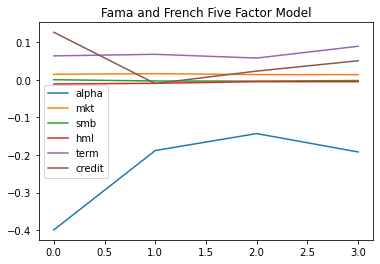

In [189]:
# PLOTTING THE RESULTS
plot_summary = five_factor_model(datasets)[['alpha', 'mkt', 'smb', 'hml', 'term', 'credit']]
plot_summary.plot(
    title = 'Fama and French Five Factor Model',
    )
plt.show()

## Commenting on the Results
We should pay attention to two issues mainly:
+ whether the intercept is positive and statistically significant
+ which factors are statistically significant and if their direction matches the past results or our assumptions.

In this case the intercept is positive ($0.0140$), but not statistically significant at the $5$% significance level.



<!-- I drew a table featuring each parameter's value and t-value (to assess its statistical significance): -->
<!-- <table>
  <tr>
    <th>Iterval</th>
    <th>Alpha</th> 
    <th>t-alpha</th>
  </tr>
  <tr>
    <td>30Y</td>
    <td>0.015121</td> 
    <td>2.656052</td>
  </tr>
  <tr>
    <td>20Y</td>
    <td>0.020302</td> 
    <td>3.913835</td>
  </tr>
  <tr>
    <td>10Y</td>
    <td>0.007810</td> 
    <td>1.323986</td>
  </tr>
  <tr>
    <td>5Y</td>
    <td>0.013967</td> 
    <td>1.643435</td>
  </tr>
</table> -->

<!-- | Interval  | Alpha       | t-alpha     |
| :---:     | :---:       | :---:       |
| 30Y       | $0.015121$  | $2.656052$  |
| 20Y       | $0.020302$  | $3.913835$  |
| 10Y       | $0.007810$  | $1.323986$  |
| 5Y        | $0.013967$  | $1.643435$  |


| Interval  | Market      | t-market    |
| :---:     | :---:       | :---:       |
| 30Y       | $1.176278$  | $8.791539$  |
| 20Y       | $1.275240$  | $10.204346$ |
| 10Y       | $1.279572$  | $8.633122$  |
| 5Y        | $1.251181$  | $6.850182$  | -->

## Multiple-Stock Portfolio

In [190]:
ASSETS = ['AAPL', 'MSFT', 'NKE', 'IBM', 'AMD', 'HD', 'BA', 'DIS', 'MO', 'PFE']
START_DATE = dt.datetime(1992,1,1)
END_DATE = dt.datetime(2022,1,1)

In [191]:
# DOWNLOAD DATA FROM YAHOO FINANCE OF PORTFOLIO
portfolio_df = pdr.get_data_yahoo(ASSETS, START_DATE, END_DATE, interval='m')
portfolio_df.tail()

Attributes   Adj Close                                                  \
Symbols           AAPL        MSFT         NKE         IBM         AMD   
Date                                                                     
2021-09-01  141.113998  280.824524  144.639389  129.511200  102.900002   
2021-10-01  149.391357  330.331360  166.609680  116.618813  120.230003   
2021-11-01  164.849091  329.305389  168.551758  114.182579  158.369995   
2021-12-01  177.344055  335.626038  165.992203  132.069168  143.899994   
2022-01-01  174.557602  310.338318  147.732895  131.980240  114.250000   

Attributes                                                            ...  \
Symbols             HD          BA         DIS         MO        PFE  ...   
Date                                                                  ...   
2021-09-01  323.303223  219.940002  169.169998  43.118046  42.314030  ...   
2021-10-01  367.988159  207.029999  169.070007  42.547070  43.032223  ...   
2021-11-01  396.566772  197.850006  144.899994  41.129154  52.860565  ...   
2021-12-01  410.821472  201.320007  154.889999  45.710850  58.604420  ...   
2022-01-01  364.778625  200.240005  142.970001  50.019573  52.292412  ...   

Attributes        Volume                                                       \
Symbols             AAPL         MSFT          NKE          IBM           AMD   
Date                                                                            
2021-09-01  1.797835e+09  502918700.0  171235500.0   80160627.0  8.671042e+08   
2021-10-01  1.565079e+09  516515800.0  132971400.0  150725359.0  9.302361e+08   
2021-11-01  1.691029e+09  509885200.0  117595600.0  120104799.0  1.373609e+09   
2021-12-01  2.444767e+09  625674800.0  123481200.0  113968900.0  1.175494e+09   
2022-01-01  2.108446e+09  947531400.0  131502000.0  146976800.0  1.638613e+09   

Attributes                                                                    
Symbols              HD           BA          DIS           MO           PFE  
Date                                                                          
2021-09-01   67432900.0  194135500.0  183753100.0  157267400.0  5.446664e+08  
2021-10-01   59686400.0  171554300.0  181076800.0  157527000.0  4.715557e+08  
2021-11-01   76047100.0  222628900.0  349411000.0  151096900.0  1.010246e+09  
2021-12-01   84890300.0  212678500.0  250556100.0  187391300.0  1.064029e+09  
2022-01-01  101082900.0  219087100.0  269830300.0  208636800.0  7.782120e+08  

[5 rows x 60 columns]

In [192]:
# CALCULATE MONTHLY RETURNS
portfolio_monthly_rets = portfolio_df['Adj Close'].pct_change().mean(axis=1).dropna()
portfolio_monthly_rets.name = 'rtn'
portfolio_monthly_rets

Date
1992-02-01    0.009603
1992-03-01   -0.043092
1992-04-01   -0.002011
1992-05-01    0.011113
1992-06-01   -0.085974
                ...   
2021-09-01   -0.053541
2021-10-01    0.053837
2021-11-01    0.049379
2021-12-01    0.048757
2022-01-01   -0.061562
Name: rtn, Length: 360, dtype: float64

In [193]:
# MERGE DATASETS AND CALCULATE EXCESS RETURN
# (Excess Return) = (Return on Asset) - (Risk-free Return)
ff_data = factor_df.join(portfolio_monthly_rets, on=factor_df.index).dropna()
#ff_data.columns = ['mkt', 'smb', 'hml', 'rf', 'rtn']
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf    # Excess Return
ff_data

,mkt,smb,hml,rf,term,credit,rtn,excess_rtn
1992-02-01,1.09,0.87,6.47,0.28,3.24,0.94,0.009603,-0.270397
1992-03-01,-2.66,-1.04,3.55,0.34,3.39,0.90,-0.043092,-0.383092
1992-04-01,1.07,-6.06,4.32,0.32,3.82,0.88,-0.002011,-0.322011
1992-05-01,0.30,0.41,1.19,0.28,3.54,0.85,0.011113,-0.268887
1992-06-01,-2.34,-3.07,3.25,0.32,3.49,0.83,-0.085974,-0.405974
...,...,...,...,...,...,...,...,...
2021-09-01,-4.37,0.80,5.09,0.00,1.48,0.70,-0.053541,-0.053541
2021-10-01,6.65,-2.28,-0.44,0.00,1.50,0.67,0.053837,0.053837
2021-11-01,-1.55,-1.35,-0.53,0.00,1.38,0.66,0.049379,0.049379
2021-12-01,3.10,-1.57,3.23,0.01,1.46,0.65,0.048757,0.038757


In [194]:
# PORTFOLIO DATAFRAME SLICING
ff_data_30y = ff_data.loc[ff_data.index >= '1992-01-01']
ff_data_20y = ff_data.loc[ff_data.index >= '2002-01-01']
ff_data_10y = ff_data.loc[ff_data.index >= '2012-01-01']
ff_data_5y = ff_data.loc[ff_data.index >= '2017-01-01']
pf_datasets = [ff_data_30y, ff_data_20y, ff_data_10y, ff_data_5y]

In [195]:
pf_summary = five_factor_model(pf_datasets)

In [196]:
# alpha
pf_alpha = five_factor_model(pf_datasets)[['interval', 'alpha', 't-alpha', 'p-alpha']]
pf_alpha

,interval,alpha,t-alpha,p-alpha
0,30Y,-0.4143,-19.6923,0.0000
1,20Y,-0.2169,-11.9766,0.0000
2,10Y,-0.1680,-8.6154,0.0000
3,5Y,-0.2114,-4.3519,0.0001


In [197]:
# mkt
pf_mkt = five_factor_model(pf_datasets)[['interval', 'mkt', 't-mkt', 'p-mkt']]
pf_mkt

,interval,mkt,t-mkt,p-mkt
0,30Y,0.0143,7.9820,0.0
1,20Y,0.0154,10.0256,0.0
2,10Y,0.0124,11.3119,0.0
3,5Y,0.0125,7.4795,0.0


In [198]:
# smb
pf_smb = five_factor_model(pf_datasets)[['interval', 'smb', 't-smb', 'p-mkt']]
pf_smb

,interval,smb,t-smb,p-mkt
0,30Y,-0.0028,-1.1299,0.0
1,20Y,-0.0036,-1.3281,0.0
2,10Y,-0.0004,-0.2291,0.0
3,5Y,0.0010,0.3535,0.0


In [199]:
# hml
pf_hml = five_factor_model(pf_datasets)[['interval', 'hml', 't-hml', 'p-hml']]
pf_hml

,interval,hml,t-hml,p-hml
0,30Y,-0.0035,-1.4566,0.1461
1,20Y,-0.0038,-1.7354,0.0840
2,10Y,0.0001,0.0620,0.9507
3,5Y,-0.0007,-0.3393,0.7357


In [200]:
# term
pf_term = five_factor_model(pf_datasets)[['interval', 'term', 't-term', 'p-term']]
pf_term

,interval,term,t-term,p-term
0,30Y,0.0665,9.7855,0.0
1,20Y,0.0713,12.0493,0.0
2,10Y,0.0638,11.6180,0.0
3,5Y,0.0945,5.9618,0.0


In [201]:
# credit
pf_credit = five_factor_model(pf_datasets)[['interval', 'credit', 't-credit', 'p-credit']]
pf_credit

,interval,credit,t-credit,p-credit
0,30Y,0.1288,6.4614,0.0000
1,20Y,-0.0011,-0.0691,0.9450
2,10Y,0.0375,2.1623,0.0327
3,5Y,0.0573,1.2679,0.2102


In [202]:
print('Single Stock:\n {}'.format(alpha))
print('Portfolio: \n{}'.format(pf_alpha))

Single Stock:
   interval   alpha  t-alpha  p-alpha
0      30Y -0.3996 -14.9916   0.0000
1      20Y -0.1881  -8.6399   0.0000
2      10Y -0.1429  -4.2709   0.0000
3       5Y -0.1919  -2.4256   0.0186
Portfolio: 
  interval   alpha  t-alpha  p-alpha
0      30Y -0.4143 -19.6923   0.0000
1      20Y -0.2169 -11.9766   0.0000
2      10Y -0.1680  -8.6154   0.0000
3       5Y -0.2114  -4.3519   0.0001


In [203]:
print('Single Stock:\n {}'.format(mkt))
print('Portfolio: \n{}'.format(pf_mkt))

Single Stock:
   interval     mkt   t-mkt  p-mkt
0      30Y  0.0151  6.6763    0.0
1      20Y  0.0167  9.0057    0.0
2      10Y  0.0142  7.5193    0.0
3       5Y  0.0141  5.1601    0.0
Portfolio: 
  interval     mkt    t-mkt  p-mkt
0      30Y  0.0143   7.9820    0.0
1      20Y  0.0154  10.0256    0.0
2      10Y  0.0124  11.3119    0.0
3       5Y  0.0125   7.4795    0.0


In [204]:
print('Single Stock:\n {}'.format(smb))
print('Portfolio: \n{}'.format(pf_smb))

Single Stock:
   interval     smb   t-smb  p-mkt
0      30Y  0.0006  0.1995    0.0
1      20Y -0.0028 -0.8501    0.0
2      10Y -0.0031 -1.0496    0.0
3       5Y -0.0016 -0.3416    0.0
Portfolio: 
  interval     smb   t-smb  p-mkt
0      30Y -0.0028 -1.1299    0.0
1      20Y -0.0036 -1.3281    0.0
2      10Y -0.0004 -0.2291    0.0
3       5Y  0.0010  0.3535    0.0


In [205]:
print('Single Stock:\n {}'.format(hml))
print('Portfolio: \n{}'.format(pf_hml))

Single Stock:
   interval     hml   t-hml   p-hml
0      30Y -0.0108 -3.5835  0.0004
1      20Y -0.0089 -3.3387  0.0010
2      10Y -0.0046 -2.0165  0.0461
3       5Y -0.0047 -1.5130  0.1360
Portfolio: 
  interval     hml   t-hml   p-hml
0      30Y -0.0035 -1.4566  0.1461
1      20Y -0.0038 -1.7354  0.0840
2      10Y  0.0001  0.0620  0.9507
3       5Y -0.0007 -0.3393  0.7357


In [206]:
print('Single Stock:\n {}'.format(term))
print('Portfolio: \n{}'.format(pf_term))

Single Stock:
   interval    term  t-term  p-term
0      30Y  0.0641  7.4413   0.000
1      20Y  0.0683  9.6128   0.000
2      10Y  0.0583  6.1777   0.000
3       5Y  0.0897  3.4732   0.001
Portfolio: 
  interval    term   t-term  p-term
0      30Y  0.0665   9.7855     0.0
1      20Y  0.0713  12.0493     0.0
2      10Y  0.0638  11.6180     0.0
3       5Y  0.0945   5.9618     0.0


In [207]:
print('Single Stock:\n {}'.format(credit))
print('Portfolio: \n{}'.format(pf_credit))

Single Stock:
   interval  credit  t-credit  p-credit
0      30Y  0.1271    5.0318    0.0000
1      20Y -0.0096   -0.5182    0.6048
2      10Y  0.0236    0.7907    0.4308
3       5Y  0.0511    0.6946    0.4903
Portfolio: 
  interval  credit  t-credit  p-credit
0      30Y  0.1288    6.4614    0.0000
1      20Y -0.0011   -0.0691    0.9450
2      10Y  0.0375    2.1623    0.0327
3       5Y  0.0573    1.2679    0.2102


## Commenting on the Results
We should pay attention to two issues mainly:
+ whether the intercept is positive and statistically significant
+ which factors are statistically significant and if their direction matches the past results or our assumptions.

In this case the intercept is positive ($0.0140$), but not statistically significant at the $5$% significance level.

## Optimal Hedge Ratio
In this last part of this project we find the number of futures needed to find the **optimal hedge ratio**.\
Optimal hedge ratio is given by the ratio between *portfolio value* and *value of one S&P 500 futures*. The data for the latter, unfortunately, are available only from 2000s and are available at Yahoo Finance with ticker name `ES=F`.

The regression analysis is carried out considering as the only dependent variable the portfolio's returns, and the explanatory variable is the percentage change in future prices with coefficient *optimal hedge ratio*.

In [211]:
SPX = 'ES=F'

In [214]:
# DOWNLOAD DATA FROM YAHOO FINANCE FOR SPX (TICKER=`ES=F`)
spx_df = pdr.get_data_yahoo(SPX, START_DATE, END_DATE, interval='m')
spx_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-11-01,1455.0,1296.75,1441.00,1321.0,1909980,1321.0
2000-12-01,1392.0,1270.25,1321.50,1327.0,1176792,1327.0
2001-01-01,1394.0,1287.50,1331.00,1373.5,2260093,1373.5
2001-02-01,1386.0,1217.00,1373.50,1242.0,2313400,1242.0
2001-03-01,1270.5,1088.00,1239.25,1174.0,2324363,1174.0


In [223]:
# MERGE DATAFRAMES
labels = {
    'pf_rets'   : portfolio_monthly_rets,
    'spx_value' : spx_df['Adj Close'],
    'spx_rets'  : spx_df['Adj Close'].pct_change()
}
pf_df = pd.DataFrame(labels).dropna()
pf_df

,pf_rets,spx_value,spx_rets
Date,,,
2000-12-01,0.010031,1327.00,0.004542
2001-01-01,0.194478,1373.50,0.035041
2001-02-01,-0.066130,1242.00,-0.095741
2001-03-01,0.010211,1174.00,-0.054750
2001-05-01,-0.020503,1254.50,0.068569
...,...,...,...
2021-09-01,-0.053541,4297.75,-0.020902
2021-10-01,0.053837,4597.00,0.069629
2021-11-01,0.049379,4566.25,-0.006689


In [253]:
# SLICING DATAFRAME INTO 20Y, 10Y, 5Y TIMEFRAMES
pf_df_20 = pf_df.loc[pf_df.index >= '2001-12-01']
pf_df_10 = pf_df.loc[pf_df.index >= '2011-12-01']
pf_df_5 = pf_df.loc[pf_df.index >= '2016-12-01']
pf_df_5.tail()

,pf_rets,spx_value,spx_rets
Date,,,
2021-09-01,-0.053541,4297.75,-0.020902
2021-10-01,0.053837,4597.00,0.069629
2021-11-01,0.049379,4566.25,-0.006689
2021-12-01,0.048757,4758.50,0.042102
2022-01-01,-0.061562,4504.25,-0.053431


In [230]:
# ESTIMATING ONE-FACTOR MODEL
of_model = smf.ols(
    formula='pf_rets ~ spx_rets',
    data=pf_df_5).fit()
of_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pf_rets   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           9.13e-13
Time:                        19:41:03   Log-Likelihood:                 109.47
No. Observations:                  53   AIC:                            -214.9
Df Residuals:                      51   BIC:                            -211.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0063      0.005      1.383      0.173      -0.003       0.015
spx_rets       0.9249      0.098      9.431      0.000       0.728       1.122
==============================================================================
Omnibus:                       13.970   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               38.605
Skew:                           0.495   Prob(JB):                     4.14e-09
Kurtosis:                       7.062   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
# ONE-FACTOR MODEL
datasets = [pf_df_20, pf_df_10, pf_df_5]
def one_factor_model (datasets):
    '''
    :params datasets: (Pandas Dataframe) or (list of Pandas DataFrames)
    :return summary: (Pandas Dataframe) containing the summary of the ols regression analysis.
    '''
    labels = {
            'interval'  : ['20Y', '10Y', '5Y'],
            'r^2'       : [],
            'alpha'     : [],
            't-alpha'   : [],
            'p-alpha'   : [],
            'beta'      : [],
            't-beta'    : [],
            'p-beta'    : []
            }
    for df in datasets:
        ff_model = smf.ols(
            formula = 'pf_rets ~ spx_rets',
            data = df
        ).fit()
        
        labels['r^2'].append(ff_model.rsquared.round(4))
        labels['alpha'].append(ff_model.params[0].round(4))
        labels['t-alpha'].append(ff_model.tvalues[0].round(4))
        labels['p-alpha'].append(ff_model.pvalues[0].round(4))
        labels['beta'].append(ff_model.params[1].round(4))
        labels['t-beta'].append(ff_model.tvalues[1].round(4))
        labels['p-beta'].append(ff_model.pvalues[1].round(4))
        #print(results.summary())
    summary = pd.DataFrame(labels)
    return summary
summary = one_factor_model(datasets)
summary

,interval,r^2,alpha,t-alpha,p-alpha,beta,t-beta,p-beta
0,20Y,0.6233,0.0081,3.6002,0.0004,0.9561,18.4175,0.0
1,10Y,0.6447,0.0046,1.6274,0.1068,0.9228,13.5368,0.0
2,5Y,0.6356,0.0063,1.3833,0.1726,0.9249,9.4313,0.0


### Hedging Analysis

In [279]:
INVESTED = 1000000
data = {
    'interval'              : ['20Y', '10Y', '5Y'],
    'invested'              : [],
    'spx_close'             : [],
    'optimal hedge ratio'   : [],
    'optimal # futures'     : [],
}

for row_num, row in summary.iterrows():
    interval = datasets[row_num]
    optimal_hedge_ratio = row['beta']
    spx_close = interval['spx_value'].iloc[-1]
    num_feats = (optimal_hedge_ratio * (INVESTED / spx_close))

    data['invested'].append('{:,.2f}$'.format(INVESTED))
    data['spx_close'].append('{:,.2f}'.format(spx_close))
    data['optimal hedge ratio'].append('{:,.4f}'.format(optimal_hedge_ratio))
    data['optimal # futures'].append('{:,.0f}'.format(num_feats))

hedging = pd.DataFrame(data)
hedging
    


,interval,invested,spx_close,optimal hedge ratio,optimal # futures
0,20Y,"1,000,000.00$","4,504.25",0.9561,212
1,10Y,"1,000,000.00$","4,504.25",0.9228,205
2,5Y,"1,000,000.00$","4,504.25",0.9249,205
